#Filtering

In [1]:
import pandas as pd

df = pd.read_csv("Datathon 2024 - Reto Hey - Dataset Público - Sheet1.csv")

df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,2023-01-02,NaN,"Muchas gracias, espero su dm"
2,2023-01-02,NaN,Muchas gracias!
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...


In [2]:
!pip install clean-text #libreria con modelo de nlp para análisis de
from cleantext import clean

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=45d70834ea113ecfdab701c49b64ef03ff91cbe3dc82858e36be511704c4581b
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [3]:
# limpieza de acentos y emojis
df['tweet']=df['tweet'].apply(lambda x: clean(x, no_emoji=True, fix_unicode=True,))
df['tweet']

0      resuelto, muchisimas gracias , excelente servi...
1                           muchas gracias, espero su dm
2                                        muchas gracias!
3      algo similar me paso. queria renovar mi token ...
4      yeeeei! a traves de mi cuenta en acabo de cont...
                             ...                        
807                     ahora confirmo, gracias estimado
808                         de acuerdo!! muchas gracias.
809    tio cuando me van a graduar, tengo la tdc gara...
810    una duda, con quien tengo que ver si tengo pro...
811    wey, lo mejor de es que puedo pagar con apple pay
Name: tweet, Length: 812, dtype: object

In [4]:
!pip install sentiment-analysis-spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 47.6 MB/s eta 0:00:00


In [5]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
feels = df['tweet'].apply(lambda x: sentiment.sentiment(x)) #asignación de los valores de sentimiento de 0 a 1, de más negativo a más positivo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
df = df.assign(sentiment= feels)
df.head() #se incluye en el dataset

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,sentiment
0,2023-01-01,NaN,"resuelto, muchisimas gracias , excelente servi...",9.996078e-01
1,2023-01-02,NaN,"muchas gracias, espero su dm",2.936779e-01
2,2023-01-02,NaN,muchas gracias!,4.705642e-01
3,2023-01-02,NaN,algo similar me paso. queria renovar mi token ...,9.935439e-08
4,2023-01-02,NaN,yeeeei! a traves de mi cuenta en acabo de cont...,3.471661e-05


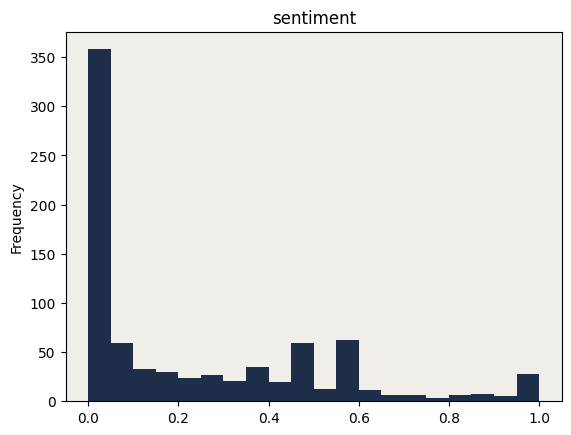

In [19]:
# @title sentiment

from matplotlib import pyplot as plt
ax = plt.axes()
ax.set_facecolor("#efeee8")
df['sentiment'].plot(kind='hist', bins=20, title='sentiment', color="#1e2e49") #Histograma de sentimientos del data set
plt.gca().spines[['top', 'right',]].set_visible(True)

df.to_csv('clean.csv')#Guarda este data set limpio para análisis futuro

#Filtered

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("clean.csv")#Utiliza el dataset limpio

In [9]:
#Separa el data set por sentimientos utilizando com threshold valores cercanos a 0, intermedios y cercanos a 1,
# elegidos mediante testeo de la sensiblidad del modelo
bad = df[df["sentiment"] <= 0.001]
good = df[df["sentiment"] >= 0.1]
neutral = df.loc[(df['sentiment'] >= 0.001) & (df['sentiment'] <= 0.1)]

In [10]:
bad_s = bad.copy() #Hace copias de los dataframes ya segementados por seguridad
good_s = good.copy()
neutral_s = neutral.copy()

#Ordena los dataframes por fecha.
bad_s = bad_s.sort_values(by='date')
good_s = good_s.sort_values(by='date')
neutral_s = neutral_s.sort_values(by='date')

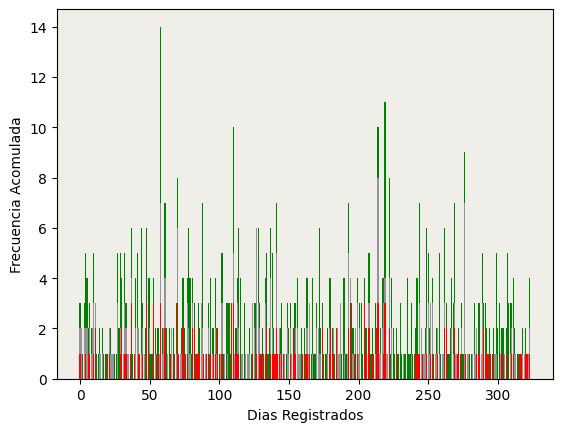

In [30]:
#Establece la cantidad de días aplicables sin repeticiones
days = list(set(df["date"]))

#Cuenta y selecciona la cantidad de tweets en ese dia para cada categoría
bad1 = [len(bad_s[bad_s["date"] == x]["sentiment"]) for x in days]
good1 = [len(good_s[good_s["date"] == x]["sentiment"]) for x in days]
neutral1 = [len(neutral_s[neutral_s["date"] == x]["sentiment"]) for x in days]

#Construye elementos de graficación
x = list(range(len(days)))
y1 = np.array(bad1)
y2 = np.array(neutral1)
y3 = np.array(good1)

# pone las gráficas de barras como acomuladas de las 3 categorías, diferenciadas por color, dónde la altura de la barra son los tweets por hora
# y los respectivos colores son las respectivas proporciones de sentimiento de esos tweets ese día.

ax = plt.axes()
ax.set_facecolor("#efeee8")
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='#929496')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.xlabel("Dias Registrados")
plt.ylabel("Frecuencia Acomulada")
plt.show()

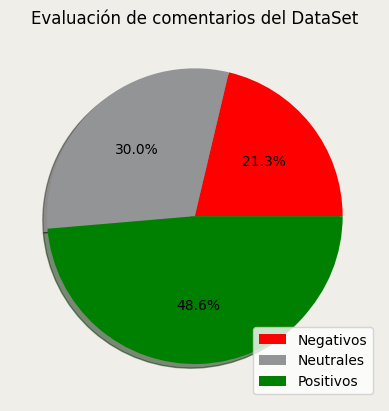

In [13]:
#Evaluacion de comentarios overall
y = np.array([len(bad),len(neutral),len(good)])
mylabels = ["Negativos", "Neutrales", "Positivos"]
mycolors = ["r", "#929496", "g"]
plt.figure(facecolor="#efeee8")
plt.pie(y, shadow=True, colors=mycolors,autopct='%1.1f%%')
plt.title("Evaluación de comentarios del DataSet")
plt.legend(labels=mylabels)
plt.show()

In [14]:
#Selecciona unicamente los datos que tienen hora de publicación para análisis específico de esto
bad_time = bad.dropna()
good_time = good.dropna()
neutral_time = neutral.dropna()

In [15]:
#Redondea la hora del día si se acerca mucho a la siguiente hora
def hour(N):
  h = int(N[:2])
  if int(N[3:5]) >= 55:
    h + 1
  return h
#Reemplaza el formato hora:minuto:segundo por la hora, para poder seleccionar estas partes del dia
bad_time['time']= bad_time['time'].apply(hour)
good_time['time']= good_time['time'].apply(hour)
neutral_time['time']= neutral_time['time'].apply(hour)

<ipython-input-15-7eb05d7ce872>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_time['time']= bad_time['time'].apply(hour)
<ipython-input-15-7eb05d7ce872>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_time['time']= good_time['time'].apply(hour)
<ipython-input-15-7eb05d7ce872>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

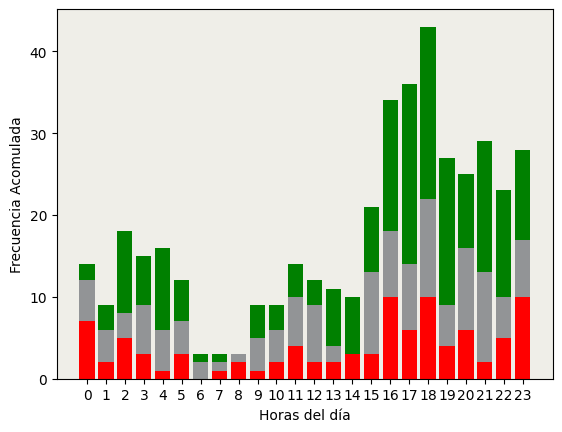

In [16]:
#Esta función suma un df que verifica si dentro de un df determinado, el valor del tiempo es equivalente al seleccionado
def f(f1,x):
  return len(f1[f1["time"] == x])

x = [str(x) for x in list(range(0,24))]
#En este caso, utiliza la función para los sub_df de sentimientos buenos, malos y neutrales para calcular la cantidad respectiva por dia
y1 = np.array([f(bad_time,x) for x in range(0,24)])
y2 = np.array([f(neutral_time,x) for x in range(0,24)])
y3 = np.array([f(good_time,x) for x in range(0,24)])

# pone las gráficas de barras como acomuladas de las 3 categorías, diferenciadas por color, dónde la altura de la barra son los tweets por hora
# y los respectivos colores son las respectivas proporciones de sentimiento de esos tweets ese día.
len(y1),len(y2),len(y3)
ax = plt.axes()
ax.set_facecolor("#efeee8")
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='#929496')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.xlabel("Horas del día")
plt.ylabel("Frecuencia Acomulada")
plt.show()

<ipython-input-17-b73eeac80728>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['date']= bad['date'].apply(mes)
<ipython-input-17-b73eeac80728>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['date']= good['date'].apply(mes)
<ipython-input-17-b73eeac80728>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

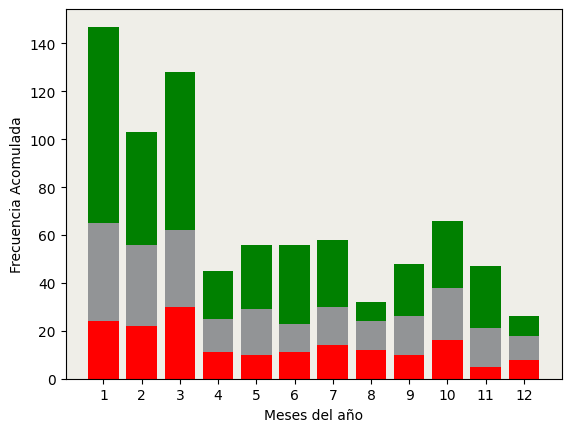

In [17]:
#Esta función selecciona el mes del formato Año/Mes/Dia para análisis mensual de tweets
def mes(M):
  return int(M[5:7])

#Utiliza la función para reemplazar este formato Año/Mes/Dia por un entero, que podemos comparar posteriormente
bad['date']= bad['date'].apply(mes)
good['date']= good['date'].apply(mes)
neutral['date']= neutral['date'].apply(mes)

#Esta función hace la comparación y cuenta de un df específico solamente los coincidentes ese mes
def g(f1,x1):
  return len(f1[f1["date"] == x1])

x1 = [str(x) for x in list(range(1,13))]

#Se utilizan los df de sentimientos y se iteran sobre la fucnon g que permite contar los 12 meses la presencia de las 3 categorías
y1 = np.array([g(bad,x) for x in range(1,13)])
y2 = np.array([g(neutral,x) for x in range(1,13)])
y3 = np.array([g(good,x) for x in range(1,13)])

# Hace un plot de barras acomuladas, del mismo modo que el de días, pero mostrando las tendencias mensuales
ax = plt.axes()
ax.set_facecolor("#efeee8")
plt.bar(x1, y1, color='r')
plt.bar(x1, y2, bottom=y1, color='#929496')
plt.bar(x1, y3, bottom=y1+y2, color='g')
plt.xlabel("Meses del año")
plt.ylabel("Frecuencia Acomulada")
plt.show()

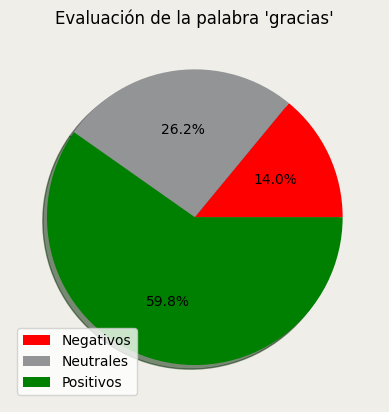

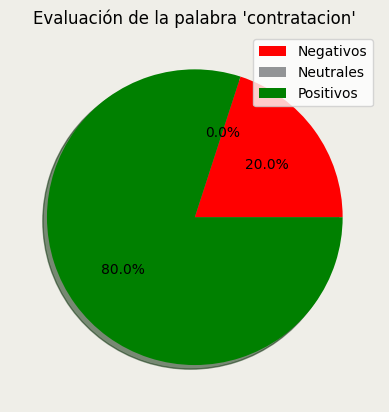

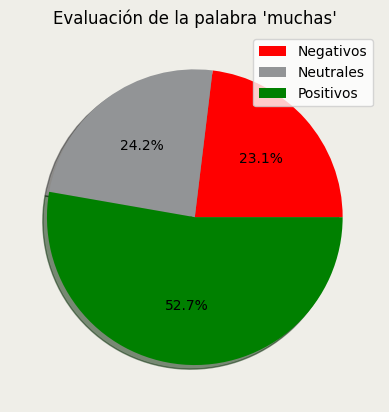

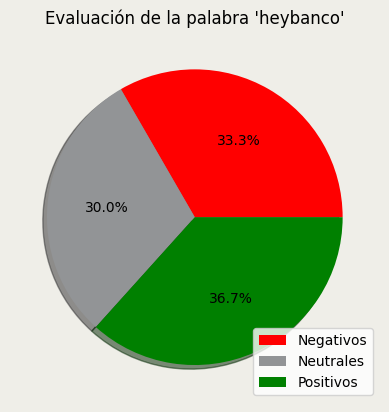

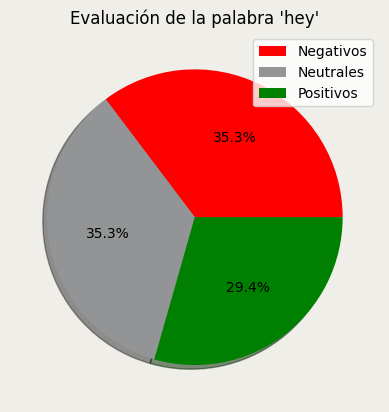

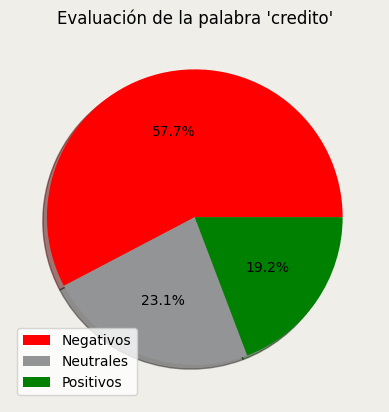

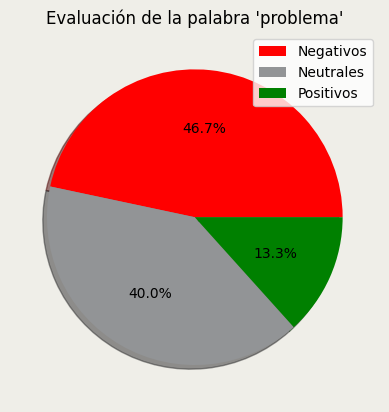

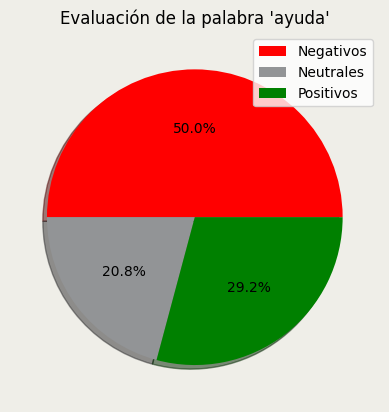

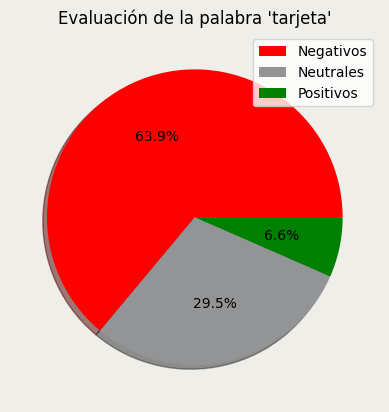

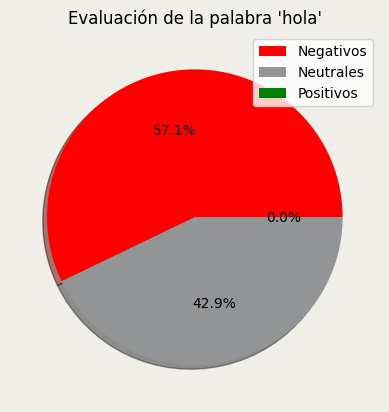

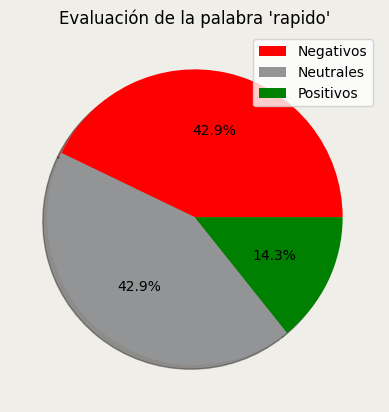

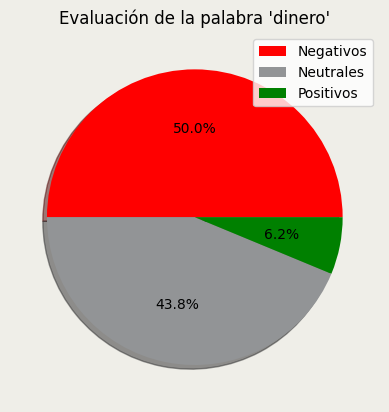

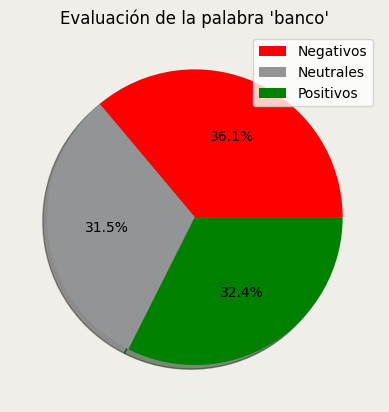

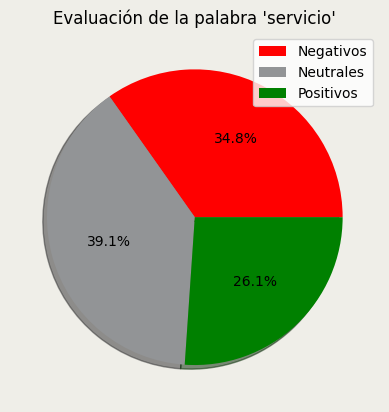

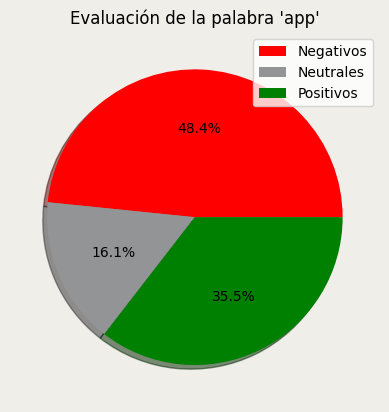

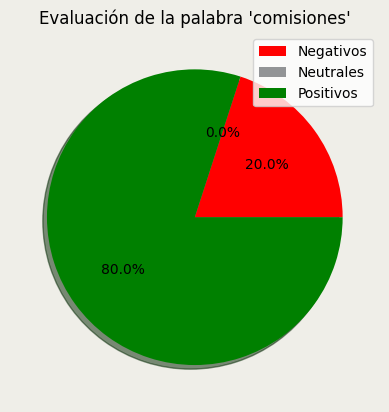

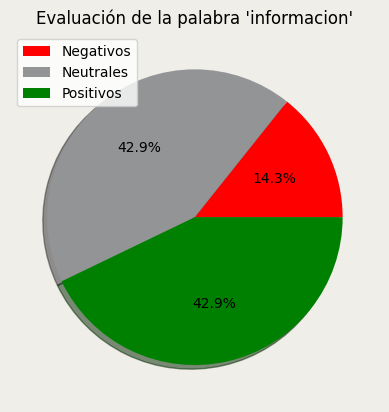

In [18]:
import math

#Esta función pretende reemplazar todos los valores que no cumplan con la condicion de que un sub string
# dado este incluido en el tweet por NaN
def check(word,x):
  n = x
  if not(word in x.lower()):
    n = float('nan')
  return n

#Esta lista permitira realizar diferentes gráficos que asociaran las palabras con los sentimientos en las oraciones en las que se encuentran
keywords = ["gracias","contratacion","muchas", "heybanco", "hey", "credito", "problema","ayuda","tarjeta","hola","rapido","dinero","banco","servicio","app","comisiones","informacion"]

#Esta función calcula la presencia de las palabras en sus respectivas categorías sentimentales,
# excluyendo todos los tweets que no tuvieran esa palabra en la oración y hace un gráfico de pie para comparar sus sentimientos asociados
def create_pie(fb,fn,fg,word):
  b = len(fb["tweet"].apply(lambda x: check(word,x)).dropna())
  n = len(fn["tweet"].apply(lambda x: check(word,x)).dropna())
  g = len(fg["tweet"].apply(lambda x: check(word,x)).dropna())

  y = np.array([b,n,g])
  mylabels = ["Negativos", "Neutrales", "Positivos"]
  mycolors = ["r", "#929496", "g"]
  plt.figure(facecolor="#efeee8")
  plt.pie(y, shadow=True, colors=mycolors,autopct='%1.1f%%')
  plt.title(f"Evaluación de la palabra '{word}'")
  plt.legend(labels=mylabels)
  plt.show()

#Este statment itera sobre la lista de palabras a verificar sus presencias sentimentales y utiliza la funcion de gráficos de pie para generar las comparaciones
for word in keywords: create_pie(bad,neutral,good,word)